In [62]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv("/Users/tomjeong/Documents/mammography/dataset.csv")
features.head(5)

,age_c,assess_c,cancer_c,compfilm_c,density_c,famhx_c,hrt_c,prvmam_c,biophx_c,mammtype,CaTypeO,bmi_c,ptid
0,62,1,0,1,2,0,0,1,0,1,8,24.023544,1
1,65,1,0,1,4,0,0,1,0,1,8,-99.000000,2
2,69,0,0,1,2,0,0,1,0,1,8,29.052429,3
3,64,2,0,1,2,0,0,1,0,1,8,-99.000000,4
4,63,3,0,1,2,0,0,1,1,1,8,33.729523,5


In [63]:
features = features.drop(columns="bmi_c")
features = features.drop(columns="ptid")
features = features.drop(columns="age_c")
features = features.drop(columns="mammtype")

features = features.drop(columns="biophx_c")
features = features.drop(columns="cancer_c")


In [64]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features["CaTypeO"])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(columns="CaTypeO")
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [65]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.25, 
                                                                            random_state = 42)

In [66]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (30000, 6)
Training Labels Shape: (30000,)
Testing Features Shape: (10000, 6)
Testing Labels Shape: (10000,)


In [73]:
baseline_preds = test_features[:, feature_list.index('density_c')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.74


In [68]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [69]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.07


In [70]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'aaaaaaaa_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('aaaaaaaa_tree.dot')
# Write graph to a png file
graph.write_png('aaaaaaaa_tree.png')

In [71]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: assess_c             Importance: 0.54
Variable: density_c            Importance: 0.18
Variable: compfilm_c           Importance: 0.1
Variable: famhx_c              Importance: 0.08
Variable: hrt_c                Importance: 0.07
Variable: prvmam_c             Importance: 0.02


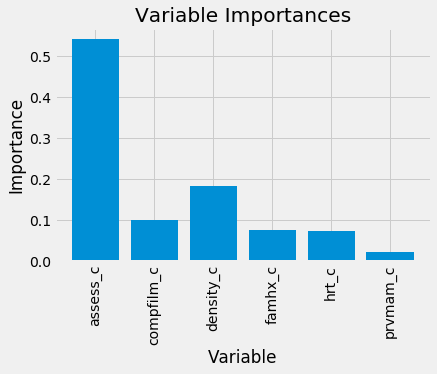

In [86]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [74]:
from sklearn.metrics import mean_squared_error

In [87]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.43 %.


In [88]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [89]:
train_labels

array([8, 8, 8, ..., 8, 8, 8])

In [90]:
train_labels.count(8)

AttributeError: 'numpy.ndarray' object has no attribute 'count'